# LENDING CLUB CASE STUDY

### IMPORT LIBRARIES REQUIRED

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


### IGNORE WARNINGS

In [76]:
import warnings
warnings.filterwarnings(action='ignore')

### IMPORT THE DATASET

In [79]:
# Reading the dataset
import pandas as pd  # Make sure to import pandas

data = pd.read_csv('loan.csv')

# Create a copy of the dataset
data_copy = data.copy()     

In [80]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## DATA CLEANUP

#### IDENTIFY COLUMNS WITH NULL VALUES

In [83]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### REMOVE COLUMNS WITH NULL VALUES

In [85]:
data.dropna(axis = 1, how = 'all', inplace = True)

#### IDENTIFY AND REMOVE COLUMNS WITH ONLY SINGLE VALUES, AS THEY MAY NOT CONTRIBUTE TO ANALYSIS

In [89]:
# Identify columns with only one unique value
single_value_columns = data.columns[data.nunique() == 1]  

# Display the columns with single unique values
print("Columns with only a single unique value:")
print(single_value_columns)

Columns with only a single unique value:
Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [91]:
# Remove single valued columns
data.drop(single_value_columns,axis = 1, inplace = True)

#### IDENTIFY DUPLICATES IN THE DATASET

In [94]:
row, column = data[data.duplicated()].shape
if row!=0:
    print(f'{row} rows have duplicate data')
else:
    print('No duplicates in the data')

No duplicates in the data


### DATA DICTIONARY OBSERVATIONS

* **"id" , 'member_id', 'url'** have only **unique** values.
* Other observations in **data dictionary**,
    * **title** - The loan title provided by the borrower.
    * **emp_title** - The job title supplied by the Borrower when applying for the loan.
    * **out_prncp_inv** - Remaining outstanding principal for portion of total amount funded by investors
    * **zip_code** - The first 3 numbers of the zip code provided by the borrower in the loan application.
    * **last_credit_pull_d** - The most recent month LC pulled credit for this loan.
    * **total_rec_late_fee** - Late fees received to date.
    * **delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
    * **last_pymnt_d** - Last month payment was received.
    * **revol_bal** - Total credit revolving balance.
    * **out_prncp** - Remaining outstanding principal for total amount funded.
    * **total_pymnt** - Payments received to date for total amount funded.
    * **total_rec_int** - Interest received to date.
    * **total_rec_prncp** - Principal received to date.    
    * **recoveries** - post charge off gross recovery.
    * **last_pymnt_amnt** - Last total payment amount received. 
    * **collection_recovery_fee** - post charge off collection fee.
    * **earliest_cr_line** - The month the borrower's earliest reported credit line was opened.
    * **addr_state** - Average current balance of all accounts
    * **desc** - Loan description provided by the borrower
    * **mths_since_last_delinq** - The number of months since the borrower's last delinquency
    * **mths_since_last_record** - The number of months since the last public record.
    * **next_pymnt_d** - Next scheduled payment date
    * **pub_rec_bankruptcies** - Number of public record bankruptcies
    * **pub_rec** - Number of derogatory public records
* The **above columns have no contributions** to analysis as they are either **derived post-approval** of loan or contain only unique values   or do not contribute to the analysis.


We shall **remove the above columns** 

In [100]:
del_col_list = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d', 
           'total_rec_late_fee', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal', 
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee', 
           'last_pymnt_amnt','recoveries','earliest_cr_line', 'addr_state','desc','mths_since_last_delinq','mths_since_last_record',
               'next_pymnt_d','pub_rec_bankruptcies','pub_rec']
data.drop(del_col_list,axis = 1, inplace = True)

### NUMBER OF ROWS AND COLUMNS IN DATASET

In [103]:
# To find the number of rows and columns
rows, columns = data.shape
print('Rows',rows,'Columns',columns)

Rows 39717 Columns 21


In [105]:
# To display maximum rows and columns which are 21 currently
pd.set_option('display.max_columns', 21)  
pd.set_option('display.max_rows', 21) 

In [107]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'inq_last_6mths', 'open_acc', 'revol_util',
       'total_acc', 'total_pymnt_inv'],
      dtype='object')

### Identify Missing Values

In [110]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
inq_last_6mths         0.000000
open_acc               0.000000
revol_util             0.125891
total_acc              0.000000
total_pymnt_inv        0.000000
dtype: float64

#### Missing Value Treatment
- Missing Values found for emp_lenght and revol_util
- emp_lenght is categorical in nature, we can replace nulls with mode
- The percentage of records with  missing values is very less so we can drop them for revol_util

In [113]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [115]:
(data.isnull().sum()/len(data.index))*100

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
inq_last_6mths         0.0
open_acc               0.0
revol_util             0.0
total_acc              0.0
total_pymnt_inv        0.0
dtype: float64

In [117]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt_inv
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,1,3,83.70%,9,5833.84
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,5,3,9.40%,4,1008.71
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,2,98.50%,10,3005.67
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,1,10,21%,37,12231.89
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,15,53.90%,38,3513.33


#### Data format correction

In [120]:
# Remove % suffix from revol_util and int_rate and convert them into numerica data types
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

#### INITIAL TARGET VARIABLE ANALYSIS (LOAN STATUS)

In [123]:
data.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

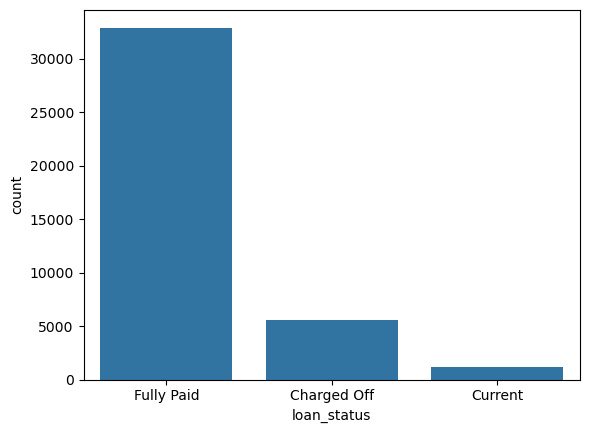

In [125]:
sns.countplot(x = 'loan_status', data = data)

#### Loan status with value 'Current' does not contribute to analysis, so we can remove it

In [127]:
data_bk_latest = data.copy()
data = data[data.loan_status != 'Current']

In [130]:
data.loan_status.value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Name: count, dtype: int64